In [1]:
#Dependencies
import os
import numpy as np
import tensorflow as tf
import PIL
import pandas as pd

import keras 
from keras.preprocessing import image
from keras.models import Model
from keras.models import load_model
from keras.utils import to_categorical
from keras.layers import Dense, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg19 import (VGG19, preprocess_input, decode_predictions)

from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
# Trained Model
model_1 = load_model("VGG19_train_b10_ep100_sgd.h5")
model_2 = load_model("Xception_train_b10_ep100_SGD.h5")

In [3]:
test_batch = 'images_split/test'

In [4]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

test_batches = test_datagen.flow_from_directory(
                                directory=test_batch,
                                target_size=(224,224),  
                                classes=['animals','beaches','birds','electronics','fashion','nature','landmarks','people'],                           
                                batch_size=5
                                )       

Found 374 images belonging to 8 classes.


In [5]:
predictions_1 = model_1.predict_generator(test_batches, 10)
predictions_2 = model_2.predict_generator(test_batches, 10)

C:\Users\KenJ\Anaconda3\lib\site-packages\PIL\Image.py:888: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


In [6]:
predictions_1
predictions_2

array([[  9.55035388e-01,   1.16103818e-03,   1.29916752e-03,
          4.84594749e-03,   1.85897254e-04,   3.33961993e-02,
          3.49772256e-03,   5.78661915e-04],
       [  9.97444868e-01,   4.58487993e-05,   9.77594682e-05,
          1.82794858e-04,   2.01503099e-05,   1.69910316e-03,
          1.62475102e-04,   3.47091205e-04],
       [  4.27691759e-07,   1.03937327e-05,   3.16135527e-07,
          9.59397585e-06,   9.94104207e-01,   4.34139511e-05,
          1.78240089e-06,   5.82996150e-03],
       [  5.46208909e-08,   1.38261186e-07,   5.80175694e-08,
          5.10257451e-07,   9.99944210e-01,   2.79968361e-07,
          1.46274758e-07,   5.46954107e-05],
       [  2.79775850e-05,   1.02054473e-05,   9.99391794e-01,
          8.76307058e-06,   5.43345050e-06,   3.02879169e-04,
          1.86279649e-04,   6.65720581e-05],
       [  8.60984102e-08,   1.13557171e-05,   2.07447400e-07,
          4.14322676e-06,   9.95981336e-01,   1.21587698e-04,
          2.41149201e-06,   3.8

In [7]:
#plot the average of accuray for each 
import matplotlib.pyplot as plt
import seaborn as sns

classes = ['animals','beaches','birds','electronics','fashion','nature','landmarks','people']

df1 = pd.DataFrame(data = predictions_1[0:,0:], columns = classes)
df2 = pd.DataFrame(data = predictions_2[0:,0:], columns = classes)

means1 = df1.mean()
errors1 = df1.std()

means2 = df2.mean()
errors2 = df2.std()

d1 = {'Mean_Accuracy': means1, 'Standard_Deviation': errors1}
table_df1 = pd.DataFrame(data=d1, index=classes)
table_df1

,Mean_Accuracy,Standard_Deviation
animals,0.259969,0.298270
beaches,0.031028,0.060300
birds,0.105083,0.172766
electronics,0.093192,0.239801
fashion,0.143084,0.240886
nature,0.199785,0.326397
landmarks,0.088782,0.168640
people,0.079077,0.074871


In [8]:
d2 = {'Mean_Accuracy': means2, 'Standard_Deviation': errors2}
table_df2 = pd.DataFrame(data=d2, index=classes)
table_df2

,Mean_Accuracy,Standard_Deviation
animals,0.229910,0.401497
beaches,0.103418,0.288521
birds,0.040375,0.196994
electronics,0.079833,0.270587
fashion,0.167859,0.360213
nature,0.175996,0.357791
landmarks,0.107378,0.293915
people,0.095231,0.254047


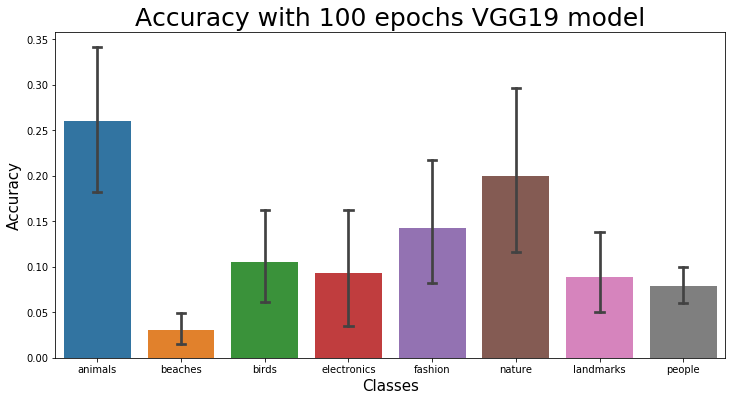

In [10]:
plt.figure(figsize=(12,6)) 
fig1 = sns.barplot(data=df1, capsize=.1) 
plt.xlabel("Classes", fontsize=15) 
plt.ylabel("Accuracy", fontsize=15) 
plt.title("Accuracy with 100 epochs VGG19 model", fontsize=25) 
plt.savefig('VGG19_100ep.png')
plt.show(fig1)


In [14]:
table_df1

,Mean_Accuracy,Standard_Deviation
animals,0.259969,0.298270
beaches,0.031028,0.060300
birds,0.105083,0.172766
electronics,0.093192,0.239801
fashion,0.143084,0.240886
nature,0.199785,0.326397
landmarks,0.088782,0.168640
people,0.079077,0.074871


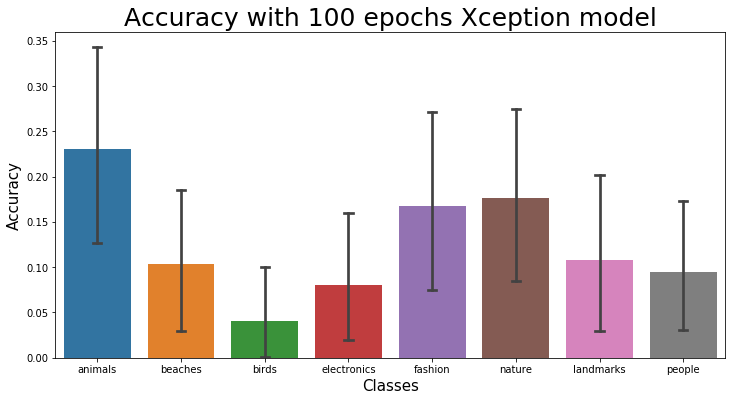

In [11]:
plt.figure(figsize=(12,6)) 
fig2 = sns.barplot(data=df2, capsize=.1) 
plt.xlabel("Classes", fontsize=15) 
plt.ylabel("Accuracy", fontsize=15) 
plt.title("Accuracy with 100 epochs Xception model", fontsize=25) 
plt.savefig('Xception_100ep.png')
plt.show(fig2)

In [15]:
table_df2

,Mean_Accuracy,Standard_Deviation
animals,0.229910,0.401497
beaches,0.103418,0.288521
birds,0.040375,0.196994
electronics,0.079833,0.270587
fashion,0.167859,0.360213
nature,0.175996,0.357791
landmarks,0.107378,0.293915
people,0.095231,0.254047


In [12]:
d3 = {'Class': classes, 'VGG19': means1, 'Xception': means2}
df3 = pd.DataFrame(data=d3)
df3

,Class,VGG19,Xception
animals,animals,0.259969,0.229910
beaches,beaches,0.031028,0.103418
birds,birds,0.105083,0.040375
electronics,electronics,0.093192,0.079833
fashion,fashion,0.143084,0.167859
nature,nature,0.199785,0.175996
landmarks,landmarks,0.088782,0.107378
people,people,0.079077,0.095231


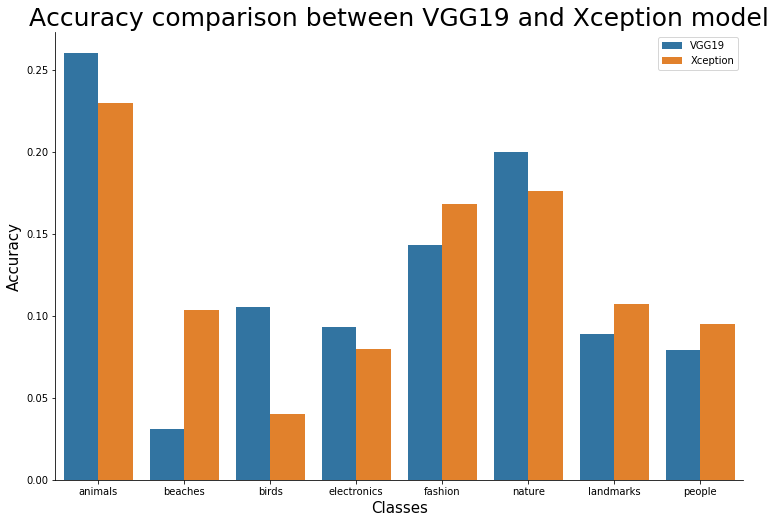

In [13]:
df = pd.melt(df3, id_vars="Class", var_name="models", value_name="Accuracy")
plt.figure(figsize=(15,8))
sns.factorplot(x='Class', y='Accuracy', hue='models', data=df, kind='bar',size=7, aspect=1.5, legend=False)
plt.legend(loc='upper right')
plt.xlabel("Classes", fontsize=15) 
plt.ylabel("Accuracy", fontsize=15) 
plt.title("Accuracy comparison between VGG19 and Xception model", fontsize=25) 
plt.savefig('Comparison_Model.png', bbox_inches="tight")
plt.show()